In [1]:
#importing required libraries
import gzip
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
#Loading training datasets
with gzip.open("./train-labels-idx1-ubyte.gz", "r") as train_label_path:
    train_label = np.frombuffer(train_label_path.read(), dtype=np.uint8, offset=8)

with gzip.open("./train-images-idx3-ubyte.gz", "r") as train_data_path:
    train_data = np.frombuffer(train_data_path.read(), dtype=np.uint8, offset=16).reshape(len(train_label), 784)

In [4]:
#Loading test datasets
with gzip.open("./t10k-labels-idx1-ubyte.gz", "r") as test_label_path:
    test_label = np.frombuffer(test_label_path.read(), dtype=np.uint8, offset=8)

with gzip.open("./t10k-images-idx3-ubyte.gz", "r") as test_data_path:
    test_data = np.frombuffer(test_data_path.read(), dtype=np.uint8, offset=16).reshape(len(test_label), 784)

In [5]:
#the data file's type
print("The type of datasets are- ")
print(type(train_data))
print(type(train_label))
print(type(test_data))
print(type(test_label))

#the shapes of data
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

The type of datasets are- 
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [6]:
print("Considering part of original datasets for classification purpose")
#using 30,000 entries of training data
train_data = train_data[:30000]
train_label = train_label[:30000]
print(train_data.shape)
print(train_label.shape)

#using 500 entries of test data
test_data = train_data[:500]
test_label = train_label[:500]
print(test_data.shape)
print(test_label.shape)

Considering part of original datasets for classification purpose
(30000, 784)
(30000,)
(500, 784)
(500,)


In [7]:
#finding the unique labels
print("The unique image labels are")
print(np.shape(np.unique(train_label))[0])
print(np.unique(train_label))

The unique image labels are
10
[0 1 2 3 4 5 6 7 8 9]


In [8]:
#Creating Dictionaries
accuracy = {}
label_predicted = {}

In [9]:
#knn Classifier
for k in np.arange(2, 10, 1):
    start = time.time()
    
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_data, train_label)
    knn_pred = knn_classifier.predict(test_data)
    
    label_predicted[k] = knn_pred
    accuracy[k] = accuracy_score(test_label,knn_pred)*100
    
    end = time.time()
    knn_time = end - start
    
    print('k=%d, accuracy=%.2f, time=%.2f ' % (k, accuracy[k], knn_time))

k=2, accuracy=91.00, time=27.67 
k=3, accuracy=93.00, time=29.75 
k=4, accuracy=89.40, time=27.18 
k=5, accuracy=88.80, time=34.68 
k=6, accuracy=88.60, time=34.08 
k=7, accuracy=88.40, time=31.64 
k=8, accuracy=88.20, time=29.95 
k=9, accuracy=88.00, time=28.56 


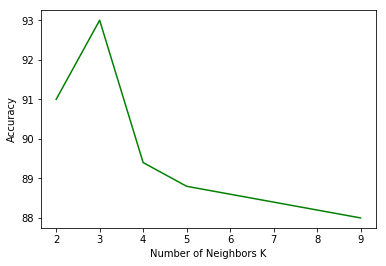

In [33]:
k_values= [2,3,4,5,6,7,8,9]
accuracy_values= [91,93,89.40,88.80,88.60,88.40,88.20,88]
plt.plot(k, accuracy_values,color='g')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy'time_values)
plt.show()
    

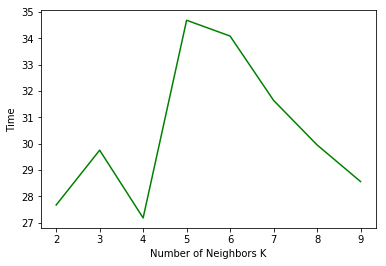

In [34]:
k_values= [2,3,4,5,6,7,8,9]
time_values= [27.67,29.75,27.18,34.68,34.08,31.64,29.95,28.56]
plt.plot(k, time_values,color='g')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Time')
plt.show()

In [29]:
#re-training the kNN model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_data, train_label)
model_pred = knn_model.predict(test_data)

In [30]:
print('Performance of kNN classifier with k=3')
print(classification_report(test_label,model_pred ))

Performance of kNN classifier with k=3
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        52
           1       1.00      0.98      0.99        54
           2       0.80      0.94      0.86        47
           3       1.00      0.88      0.93        49
           4       0.94      0.92      0.93        53
           5       1.00      0.92      0.96        51
           6       0.95      0.75      0.84        53
           7       0.92      1.00      0.96        49
           8       0.96      0.98      0.97        50
           9       1.00      1.00      1.00        42

   micro avg       0.93      0.93      0.93       500
   macro avg       0.94      0.93      0.93       500
weighted avg       0.94      0.93      0.93       500



In [31]:
#confusion matrix
cf_matrix = confusion_matrix(test_label, label_predicted[3])
print(cf_matrix)

[[49  0  1  0  0  0  1  0  1  0]
 [ 0 53  1  0  0  0  0  0  0  0]
 [ 2  0 44  0  1  0  0  0  0  0]
 [ 3  0  2 43  1  0  0  0  0  0]
 [ 1  0  2  0 49  0  1  0  0  0]
 [ 0  0  0  0  0 47  0  4  0  0]
 [ 7  0  4  0  1  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  0  1  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  0 42]]
